# 21M.387 Fundamentals of Music Processing
## Lab1

## Jupyter Notebook

You are looking at a Jupyter notebook. It is an interactive document, backed by a server running the jupyter app. In this class, each of you will run your own server locally from the command line:

`$ jupyter notebook`

From there on, you interact through the web browser.

The notebook document itself is a file saved on your local computer. It has a `.ipynb` file extension. The notebook you are looking at now is called `lab1.ipynb`

Begin by going through the _User Interface Tour_ in the _Help_ Menu.

## Cells and Modes

Notebooks are divided into a bunch of _cells_. Each cell can be one of two types:
- __Markdown Cell__ used for nicely formatted text
- __Code Cell__ used for typing and executing python code, and seeing the results

Additionally, the notebook can be in one of two modes:
- __Edit Mode__ for editing text in a cell. 
- __Command Mode__ for notebook-wide operations like adding, deleting, moving cells, or changing the cell type.

In Edit Mode, the current cell has a <font color='green'>green border</font>. You enter Edit Mode by:
- double clicking on a cell
- hitting Enter in a cell

You can _execute_ a cell. This will render a Markdown Cell or run the code of a Code Cell. You execute a cell by:
- pressing _Shift-Enter_ (to execute and move to the next cell)
- pressing _Control-Enter_ (to execute and stay on the current cell)

Executing a cell automatically changes the mode to Command Mode. In Command Mode, the current cell has a <font color='blue'>blue border</font>. You enter Command Mode by:
- executing a cell (_Shift-Enter_ or _Control-Enter_)
- pressing ESC

Now is an excellent time to look at keyboard shortcuts by either:
- selecting _Help_ Menu -> _Keyboard Shortcuts_
- pressing _h_ when in Command Mode.

## Markdown

[This page](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) is a good markdown cheatsheet.

Markdown also uses [MathJax](http://meta.math.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) for fancy math formulas:

$\sum_{i=0}^n i^2 = \frac{(n^2+n)(2n+1)}{6}$


## Code

The next two cells are code cell. Execute the code there (with Control-Enter). Change the code and execute it again.

The code cell will automatically print the last value (which you can supress with a `;` at the end).  
You can also use `print`.

In [2]:
4 * 8

32

In [4]:
print 7 + 5

a = 3
b = 'hi'
c = [5,6,7]

print b, [a + i for i in c]

"do not " + "print " + "this";

12
hi [8, 9, 10]


## Setup / Import

You will usually find the next Code Cell (or something like it) at the top of a notebook. I use it to set up the python environment you'll need for the rest of the notebook.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact

import sys
sys.path.append("../common")
from util import *

# choose one of these: inline or notebook.
# renders the plot as an image which you can see.
#%matplotlib inline

# creates an "interactive plot" which some navigation controls.
%matplotlib notebook   

## Exercise 1

1. Find a song. There must must be a song somewhere on your computer.
- Open that song in [Audacity](http://www.audacityteam.org/download/).
- Find 10 seconds that you think are interesting.
- Change the _Project Rate (Hz)_ to 22050 (lower left corner).
- Export that bit of audio using _File_ -> _Export Selected Audio_.
- Choose the format _WAV (Microsoft) signed 16-bit PCM_.
- Load that audio and play it in the code cell below by using:  
`ipd.Audio('your file name.wav')`

In [2]:
ipd.Audio('mirchi.wav')

Now, load that same audio into python by calling:  
`x = load_wav('your file name.wav')`

Try using TAB completion. It works for both function and filenames.

The sample rate is 22050. In fact, `load_wav()` is a special function I wrote that will fail if the underlying wave file is NOT 22050. It will also convert stereo to mono. Type:
`load_wav?` and execute the cell to see help about that function.

- Inspect the length of `x` with `len(x)`
- Play the vector `x` with `ipd.Audio(x, rate=22050)`
- Change the `rate` to some other number for fun. 

In [78]:
x = load_wav('mirchi.wav')
print len(x)
fs = 22050

ipd.Audio(x, rate = fs * 0.5)


226724


## Exercise 2

Plot the audio that you just loaded. You use matplotlib's `pyplot`, which we imported into the namespace `plt`. There are about a billion plotting options in matplotlib. [Here](http://matplotlib.org/users/pyplot_tutorial.html) is a pyplot tutorial (for future reference).

The basic plot is easy:  
`plt.figure()` will set up a new figure.  
`plt.plot(x)`  will plot to the most recent figure.

<IPython.core.display.Javascript object>


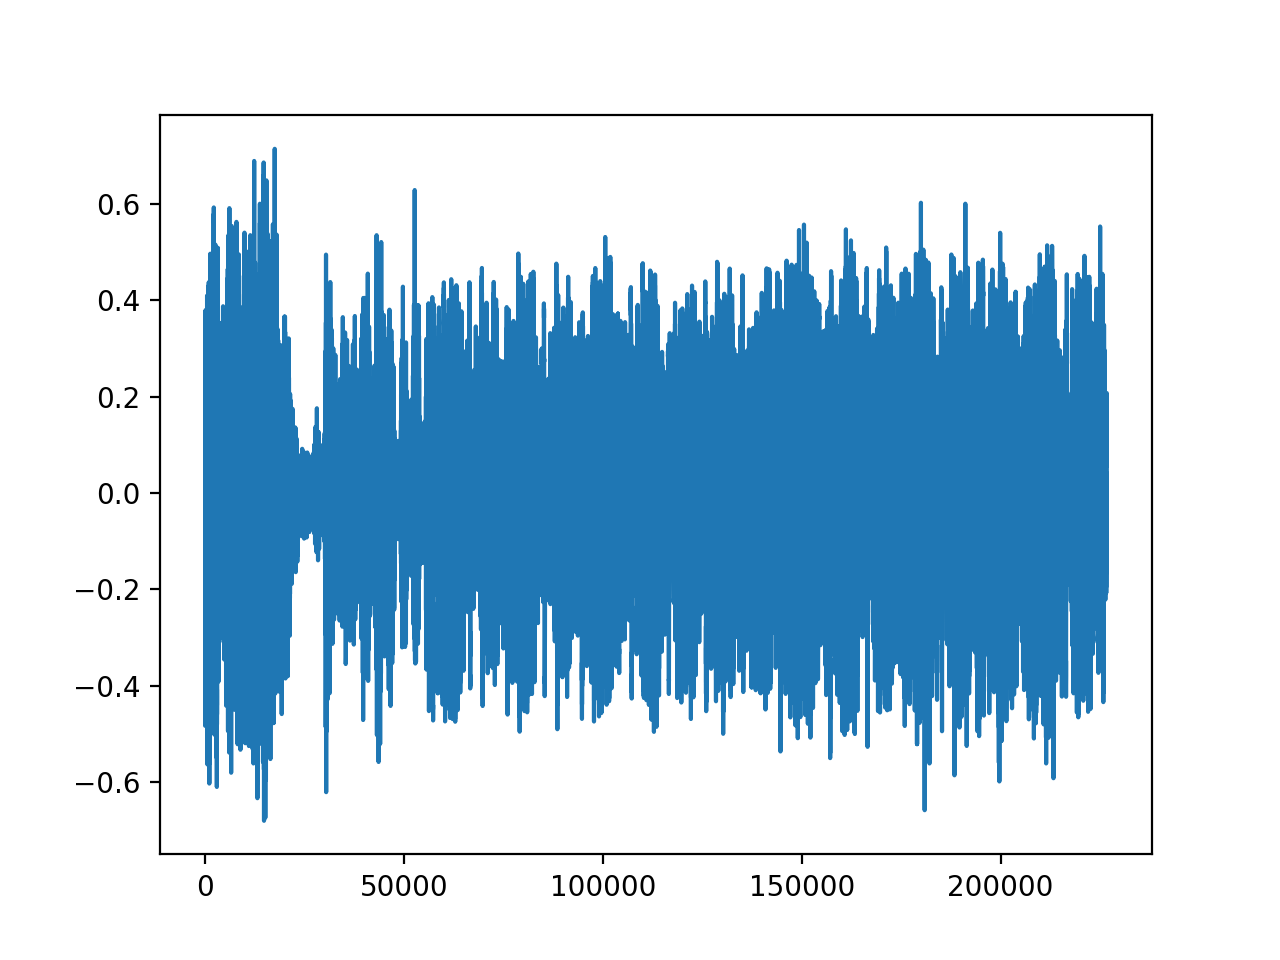

In [79]:
plt.figure()
plt.plot(x)

Let's label the time axis better. For each point on the x-axis, we want to supply the correct time value.

- We have $x(n)$. We want to create $t(n)$ which provides the correct time value at index $n$.
- Create the vector `t`
- It should be the same length as `x`.
- Use the functions `np.arange()`. You can see some examples below. 
- In numpy, all mathematical operations work on arrays (vectors) as well as scalars.

Once you have created the correct vector `t`, you can plot:  
`plt.figure()
plt.plot(t, x)`

<IPython.core.display.Javascript object>


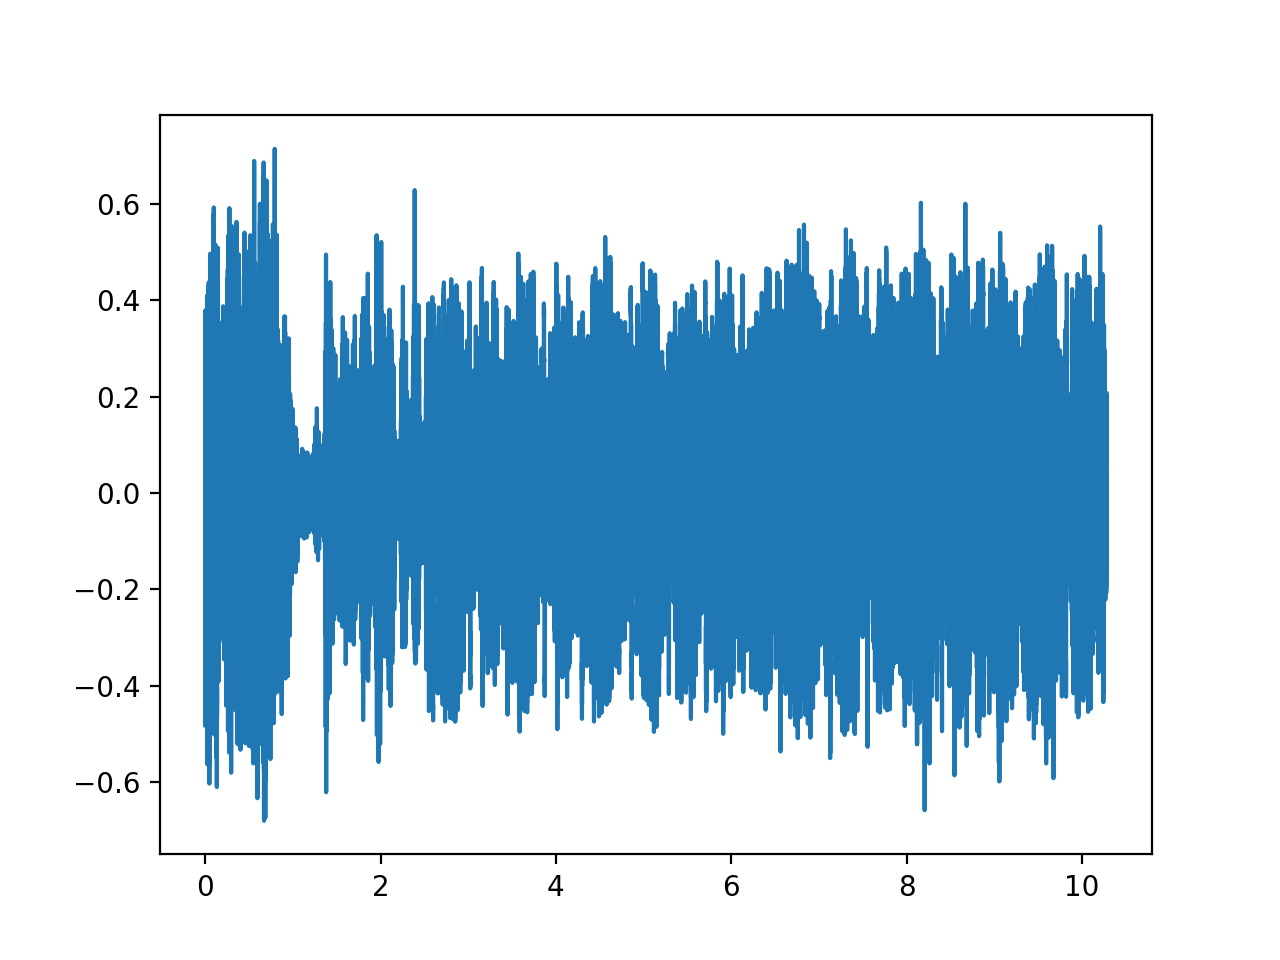

In [80]:
#a = np.arange(10)
#print a
#a = a * .1
#print a
#a = a + 2
#print a

fs = 22050.
t = np.arange(len(x))
t = t / fs
plt.figure()
plt.plot(t, x)

## Exercise 3

Now, we will modify the audio signal x.

- Create a new vector $g(n)$ that is a linear ramp going from 0.0 to (almost) 1.0.
- Plot `g`
- Then, do a vector point-by-point multiply in numpy: `x * g` to make a new vector `y`.
- Plot `y`
- Listen to it.


<IPython.core.display.Javascript object>


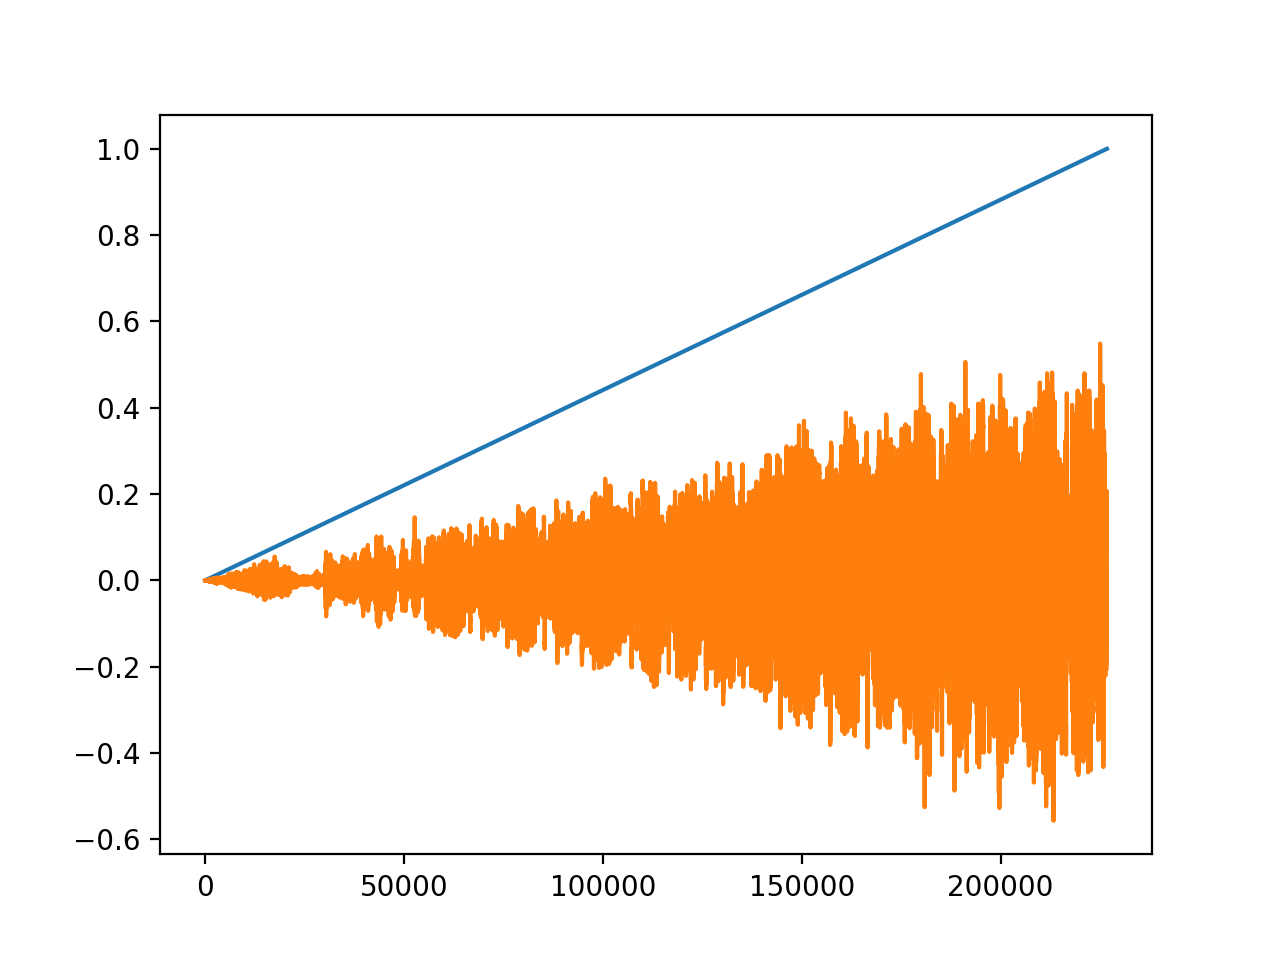

In [81]:
# simulates someone turning up the volume

g = np.arange(len(x), dtype=np.float)
g = g / len(x) # be careful of integer division!

y = x * g

plt.figure()
plt.plot(g)
plt.plot(y)

ipd.Audio(y, rate = fs)


## Exercise 4

As you know, loudness scales as the _log_ of amplitude, so we often measure volume in decibels (dB). The reference amplitude in this case is 1.0 (max volume). As we scale down the amplitude, the volume (in dB) goes negative.

Remember that the relationship between amplitude and the dB scale is:
$$ v_{dB} = 20 \cdot \log_{10}(a) $$

For example:

| dB    | Amp   |
|-------|-------|
| 0     | 1.0   |
| -6.02 | 0.5   |
| -40   |  0.01 |


- Make a new vector `g` that modifies the volume of `x` in a _linearly perceived_ way, starting at $v_{dB} = -40$ and ending at $v_{dB} = 0$.
- As above, plot `g` and `g * x`, and listen to the result.
- Instead of using np.arange(), try using np.linspace(). See some usage examples below.
- Oh. Also, to do exponents in numpy, use `**`

<IPython.core.display.Javascript object>


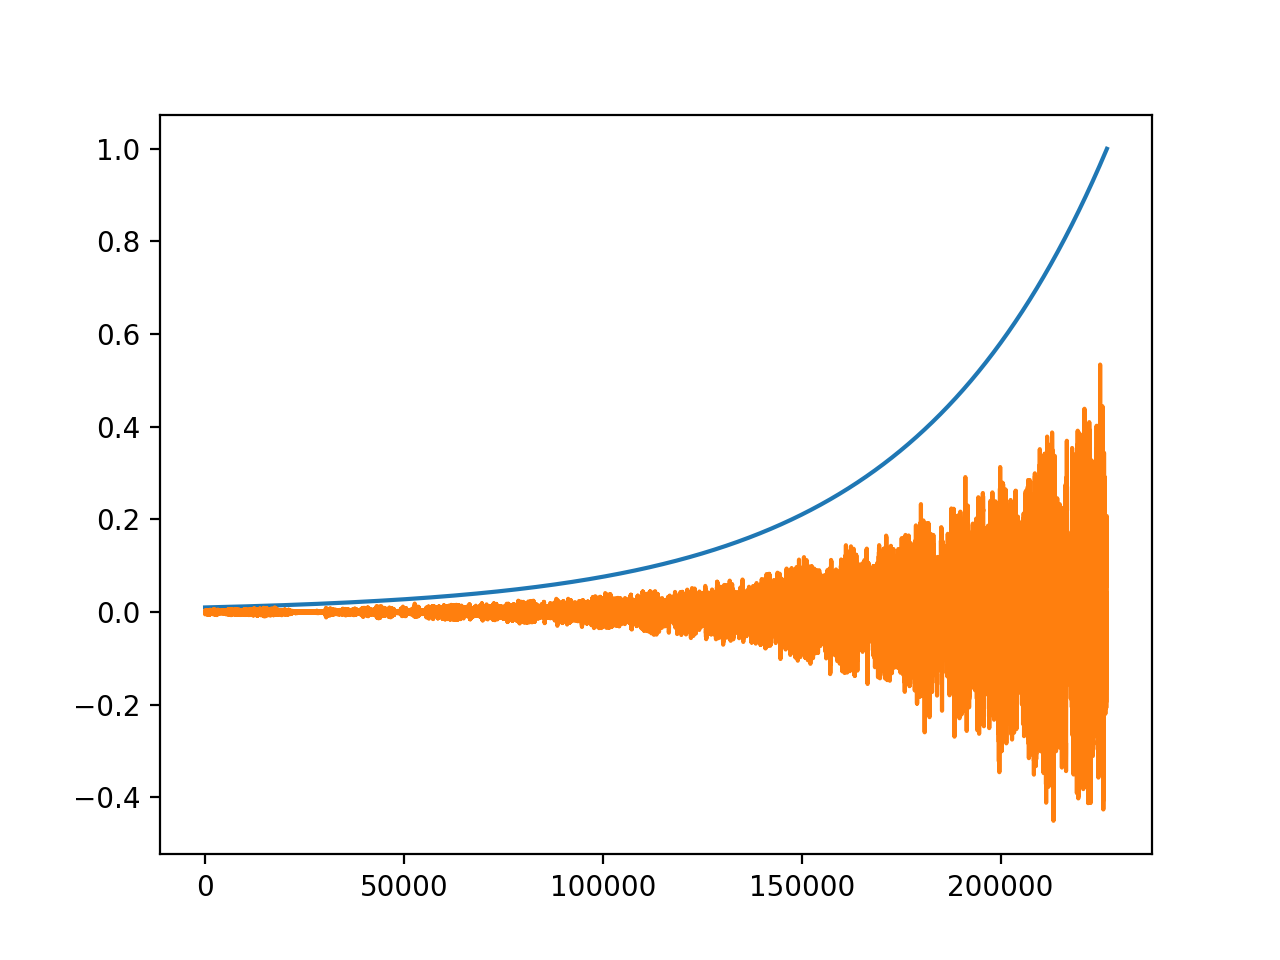

In [82]:
#print np.linspace(2, 4, 10)
#print np.linspace(-5, 5, 20, endpoint=False)
#print np.linspace(0,4,5) ** 2

# db increases linearly from -40 to 0, then convert to amplitude (A = 10**(db/20))
g = 10**(np.linspace(-40, 0, len(x))/20)
y = g * x

plt.figure()
plt.plot(g)
plt.plot(y)

ipd.Audio(y, rate = fs)

## Exercise 5

For this problem, it is useful to concatenate two vectors together. See below.

Make a volume ramp up to the half-way point and then ramp back down.
The volume curve should be (if song length is $L$):
- for $n=[0, {L\over2}) \rightarrow v=[-40db,0db)$
- for $n=[{L\over2},L) \rightarrow v=[0db,-40db)$

Plot and listen.

[0 1 2 3]
[ 1.  1.  1.]
[ 0.  1.  2.  3.  1.  1.  1.]


<IPython.core.display.Javascript object>


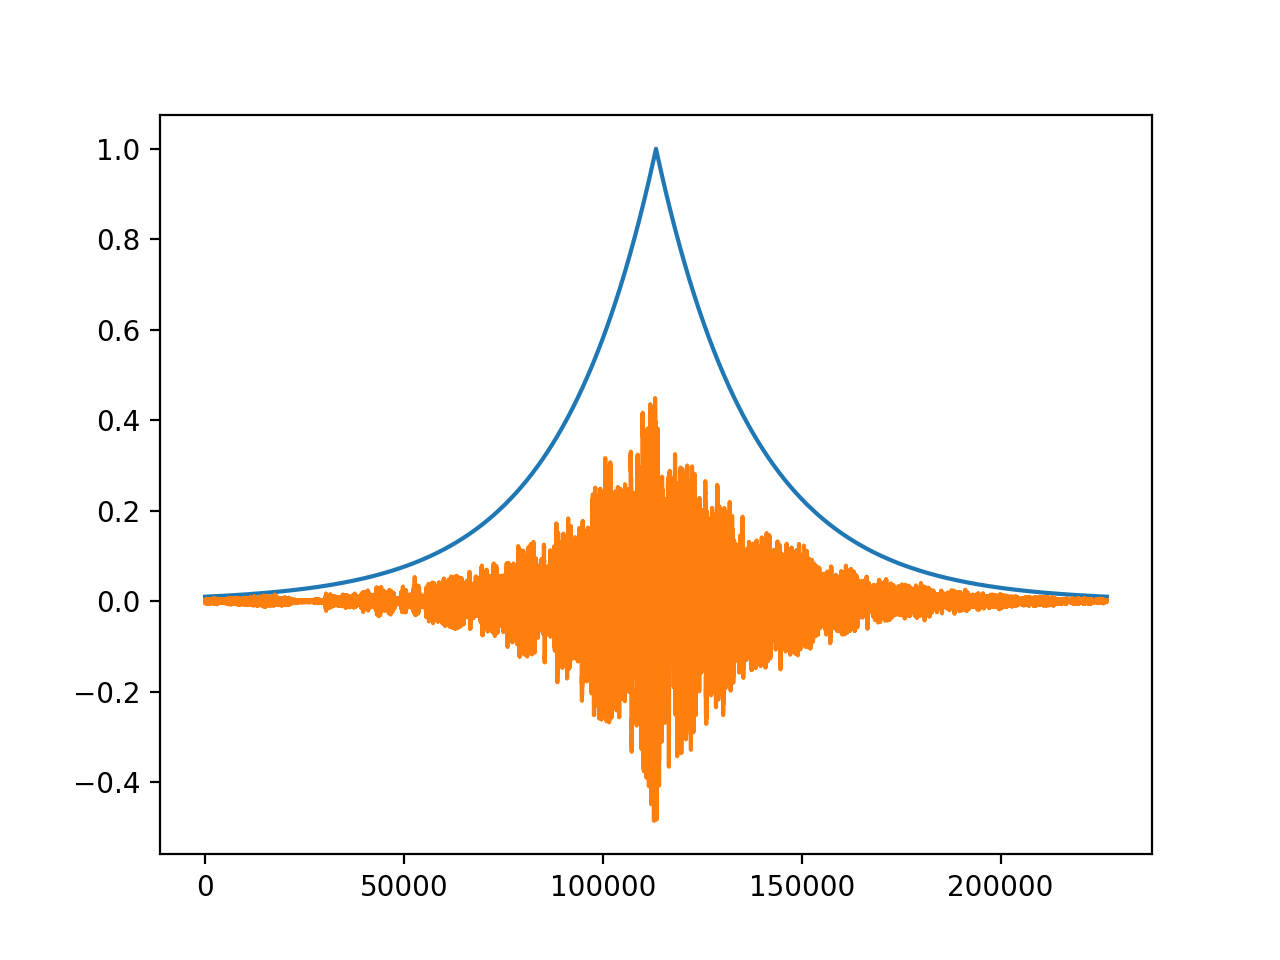

In [83]:
a = np.arange(4)
b = np.ones(3)
c = np.concatenate((a,b))
print a
print b
print c

v1 = 10**(np.linspace(-40, 0, len(x)/2)/20)
v2 = 10**(np.linspace(0, -40, len(x)/2)/20)
v = np.concatenate((v1, v2))
y = v*x

plt.figure()
plt.plot(v)
plt.plot(y)

ipd.Audio(y, rate = fs)


## Exercise 6

Now instead of using $x(n)$ from a file, synthesize your own $x(n)$ to be a sine wave at a particular frequency in Hertz using the following function:

$$x(n) = sin(2 \pi f n / F_s) $$

where $f$ is the desired frequency in Hertz and $F_s$ is the sampling rate of your generated audio.

Once you have the basic sine wave, you can play around with some more ideas:
- add a number of sine waves together of different frequencies.
- apply a volume curve like you did above.
- stitch together a number of sine waves in a row to generate a melody.


In [92]:

def vol_filter(db1, db2, L):
    db = np.linspace(db1, db2, L)
    return 10 ** (db/20.)

def make_sine_wave(freq, dur):
    N = int(dur * fs)
    n = np.arange(N)
    x = np.sin(2* np.pi * freq * n / fs)
    x = x * vol_filter(0, -40, N)
    return x

def p_to_f(p):
    return 440. * (2** (p/12.))

def create_melody(notes):
    x = np.zeros(0)
    for pitch, dur in notes:
        freq = p_to_f(pitch)
        y = make_sine_wave(freq, dur)
        x = np.concatenate((x, y))
    return x

#x = make_sine_wave(233.08, 1.5)
#ipd.Audio(x, rate = fs)

melody = ([7, 1], [0, 0.5], [2, .5], [4, .5], [5, .5], [7, 1], [0, 1], [0, 1])

x = create_melody(melody)
ipd.Audio(x, rate = fs)

